In [48]:
import pandas as pd
import math
from sklearn import linear_model
from word2number import w2n
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [39]:
df.experience=df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [40]:
df.experience=df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [41]:
median_value=math.floor(df['test_score(out of 10)'].mean())
median_value

7

In [42]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_value)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [43]:
model = linear_model.LinearRegression()
model.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [47]:
model.predict([[12,10,10]])

c:\Users\Syed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

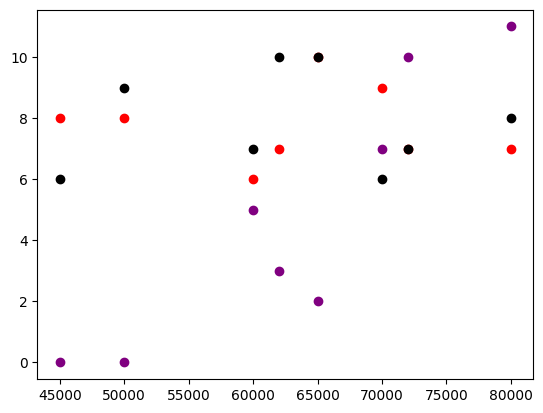

In [51]:
%matplotlib inline
plt.xlabel='salary($)'
plt.ylabel='experience'
plt.scatter(df['salary($)'],df['experience'],color="purple")

%matplotlib inline
plt.xlabel='salary($)'
plt.ylabel='test_score(out of 10)'
plt.scatter(df['salary($)'],df['test_score(out of 10)'],color="red")

%matplotlib inline
plt.xlabel='salary($)'
plt.ylabel='interview_score(out of 10)'
plt.scatter(df['salary($)'],df['interview_score(out of 10)'],color="black")



In [54]:
y_pred = model.predict(df[['experience','test_score(out of 10)','interview_score(out of 10)']])
y_pred

array([52090.46734071, 45648.01964161, 57964.2290839 , 64525.1061363 ,
       68325.21184635, 60783.44785255, 74796.8832586 , 79866.63483999])

ValueError: x and y must be the same size

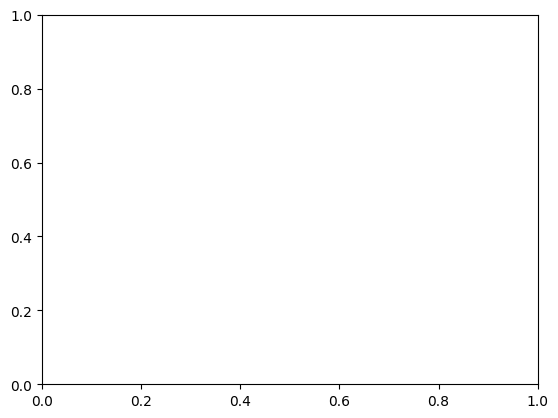

In [55]:
plt.scatter(df[['experience','test_score(out of 10)','interview_score(out of 10)']], df['salary($)'], label='Data')
# plt.plot(df[['experience','test_score(out of 10)','interview_score(out of 10)']], y_pred, color='red', linewidth=2, label='Best fit line')
plt.legend()
plt.show()